<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_3mins_deeplearning/blob/master/6_CNN(LeNet)_mnist_sequential%EB%B0%A9%EC%8B%9D_%ED%81%B4%EB%9E%98%EC%8A%A4%ED%98%95_with%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tip. Colab Shortcuts
* show docstring : `cmd + shift + space`
* autocomplete : `ctrl + space`

In [0]:
!git clone https://github.com/duc-ke/study_3mins_deeplearning.git
%run study_3mins_deeplearning/0_plot_performance.ipynb

fatal: destination path 'study_3mins_deeplearning' already exists and is not an empty directory.


In [0]:
from keras import layers, models
from keras.utils import np_utils
from keras import datasets
from keras import backend

In [0]:
class CNN(models.Sequential):
  def __init__(self, input_shape, num_of_classes):
    super().__init__()

    self.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    self.add(layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
    self.add(layers.MaxPool2D(pool_size=(2,2)))
    self.add(layers.Dropout(0.25))

    self.add(layers.Flatten())
    self.add(layers.Dense(128, activation='relu'))
    self.add(layers.Dropout(0.5))
    self.add(layers.Dense(num_of_classes, activation='softmax'))


    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
class Data():
  def __init__(self):
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    print(x_train.shape)
    n, r, c = x_train.shape
    x_train = x_train.reshape(-1, r, c, 1)
    x_test = x_test.reshape(-1, r, c, 1)
    input_shape = (r, c, 1)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    x_train = x_train / 255.0
    x_test = x_test / 255.0
  
    self.num_of_classes = 10
    self.input_shape = input_shape
    self.x_train, self.y_train = x_train, y_train
    self.x_test, self.y_test = x_test, y_test


In [0]:
data = Data()

(60000, 28, 28)


In [0]:
model = CNN(data.input_shape, data.num_of_classes)
history = model.fit(data.x_train, data.y_train, epochs=10, batch_size=100, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 127us/step - loss: 0.2600 - acc: 0.9204 - val_loss: 0.0625 - val_acc: 0.9817
Epoch 2/10
48000/48000 [==============================] - 6s 118us/step - loss: 0.0919 - acc: 0.9721 - val_loss: 0.0469 - val_acc: 0.9852
Epoch 3/10
48000/48000 [==============================] - 6s 115us/step - loss: 0.0691 - acc: 0.9786 - val_loss: 0.0416 - val_acc: 0.9884
Epoch 4/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0543 - acc: 0.9833 - val_loss: 0.0372 - val_acc: 0.9894
Epoch 5/10
48000/48000 [==============================] - 5s 114us/step - loss: 0.0477 - acc: 0.9846 - val_loss: 0.0386 - val_acc: 0.9889
Epoch 6/10
48000/48000 [==============================] - 6s 116us/step - loss: 0.0408 - acc: 0.9870 - val_loss: 0.0387 - val_acc: 0.9896
Epoch 7/10
48000/48000 [==============================] - 5s 113us/step - loss: 0.0344 - acc: 0.9890 - val_loss: 0.0392 - 

In [0]:
evaluation = model.evaluate(data.x_test, data.y_test, batch_size=100)
print(evaluation)

10000/10000 [==============================] - 0s 32us/step
[0.028232509624936314, 0.9922000068426132]


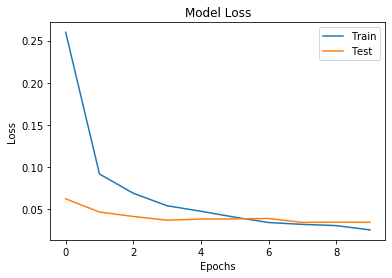

In [0]:
plot_loss(history)

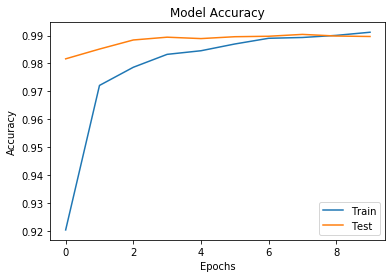

In [0]:
plot_acc(history)

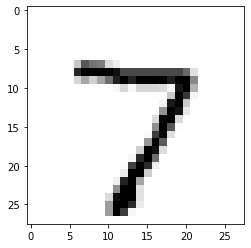

True value : 7
0 1.7092523e-16
1 1.3013753e-12
2 1.372318e-12
3 1.1502058e-10
4 1.3039565e-16
5 3.3213955e-17
6 1.138167e-19
7 1.0
8 2.7181663e-16
9 1.8836903e-10


In [0]:
# model prediction

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

test_sample = x_test[0]
plt.imshow(test_sample, cmap='Greys')
plt.show()

result = model.predict(data.x_test[:1])
print('True value : {}'.format(y_test[0]))

result = result.flatten()
for index, each in enumerate(result):
  print(index, each)